# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plot

## Lectura
### Lectura de los datos

In [2]:
import loadData as ld

datos = ld.load(r"../data/")

datos = ld.preprocess(datos)

In [3]:
print(len(datos))
datos.head()

4482391


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
0,2018-10-30 21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
1,2018-10-30 21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2018-10-30 21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2018-10-30 21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
4,2018-10-30 21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False


In [6]:
## Paramos a True a los target entre las 3:30 del dia 10 de noviembre hasta las 3:50
datos = ld.newSeizure(datos,'2018-11-10 3:30:00',60*20)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
0,2018-10-30 21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
1,2018-10-30 21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2018-10-30 21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2018-10-30 21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
4,2018-10-30 21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False


## Componentes principales

In [7]:
from sklearn.decomposition import PCA

### Datos Brutos

In [12]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'PCA Raw')

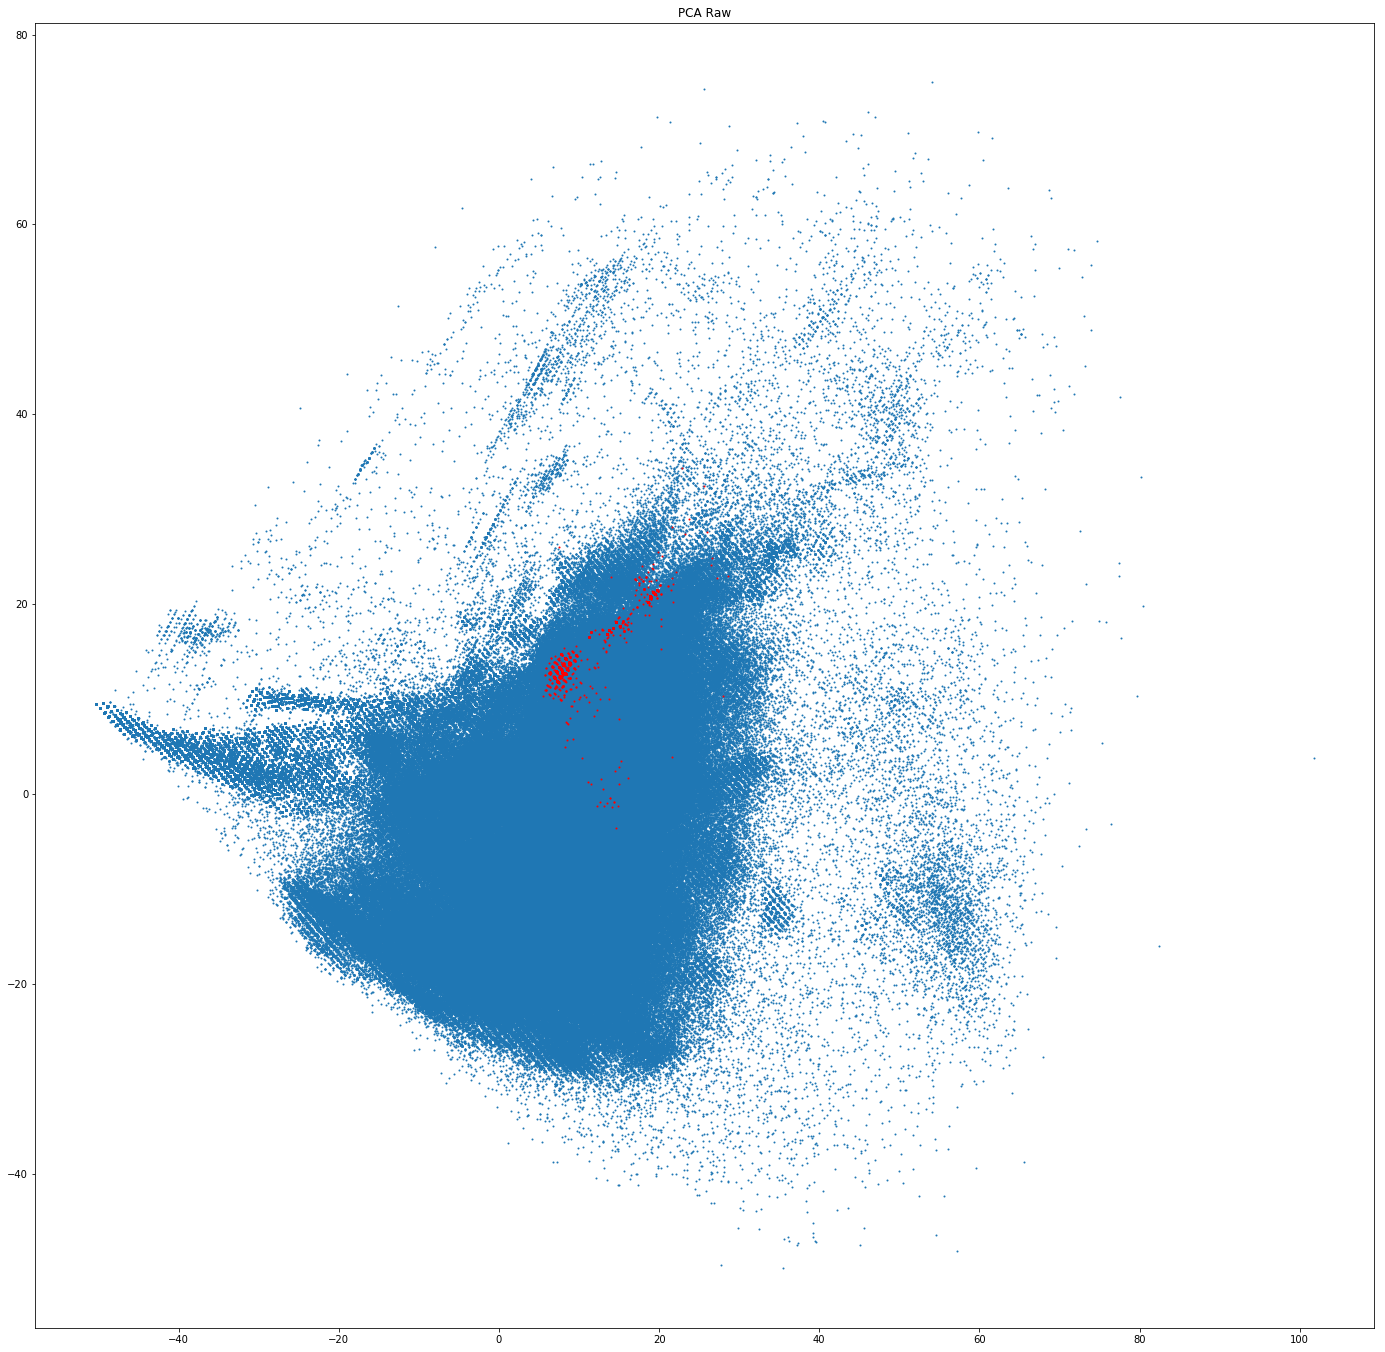

In [14]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')


### Estadísticas móviles

#### Slider de la ventana

In [15]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    description='ventana:',
    readout=True,
    readout_format='d'
)
display(slider)

IntSlider(value=5, description='ventana:', max=10, min=1)

In [18]:
ventanaMedia = slider.value

datosEstadisticos = datos.copy()
for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    datosEstadisticos[nombre_col_mean] = datosEstadisticos[nombre_col].rolling(ventanaMedia).mean()

datosEstadisticos.head()

ventanaDesviacion = ventanaMedia

for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_std = nombre_col+' std'
    datosEstadisticos[nombre_col_std] = datosEstadisticos[nombre_col].rolling(ventanaDesviacion).std()

In [19]:
data = datosEstadisticos.dropna()
data = data.iloc[:,14:]
data.head() 

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
6,3.285714,25.714286,28.000000,22.571429,2.000000,0.0,1.285714,0.0,0.0,0.0,...,0.816497,0.534522,1.000000,0.0,0.755929,0.0,0.0,0.0,0.534522,0.0
7,3.142857,25.428571,27.714286,22.428571,1.857143,0.0,1.142857,0.0,0.0,0.0,...,0.755929,0.534522,0.899735,0.0,0.690066,0.0,0.0,0.0,0.534522,0.0
8,3.142857,25.285714,27.571429,22.428571,2.000000,0.0,1.000000,0.0,0.0,0.0,...,0.786796,0.534522,0.816497,0.0,0.816497,0.0,0.0,0.0,0.534522,0.0
9,3.142857,25.428571,27.714286,22.571429,2.285714,0.0,1.285714,0.0,0.0,0.0,...,0.755929,0.534522,0.755929,0.0,0.755929,0.0,0.0,0.0,0.534522,0.0
10,3.000000,25.285714,27.571429,22.428571,2.142857,0.0,1.142857,0.0,0.0,0.0,...,0.786796,0.534522,0.690066,0.0,0.690066,0.0,0.0,0.0,0.534522,0.0


In [20]:
medias = data.iloc[:,0:12]
desv = data.iloc[:,12:]

pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(data)

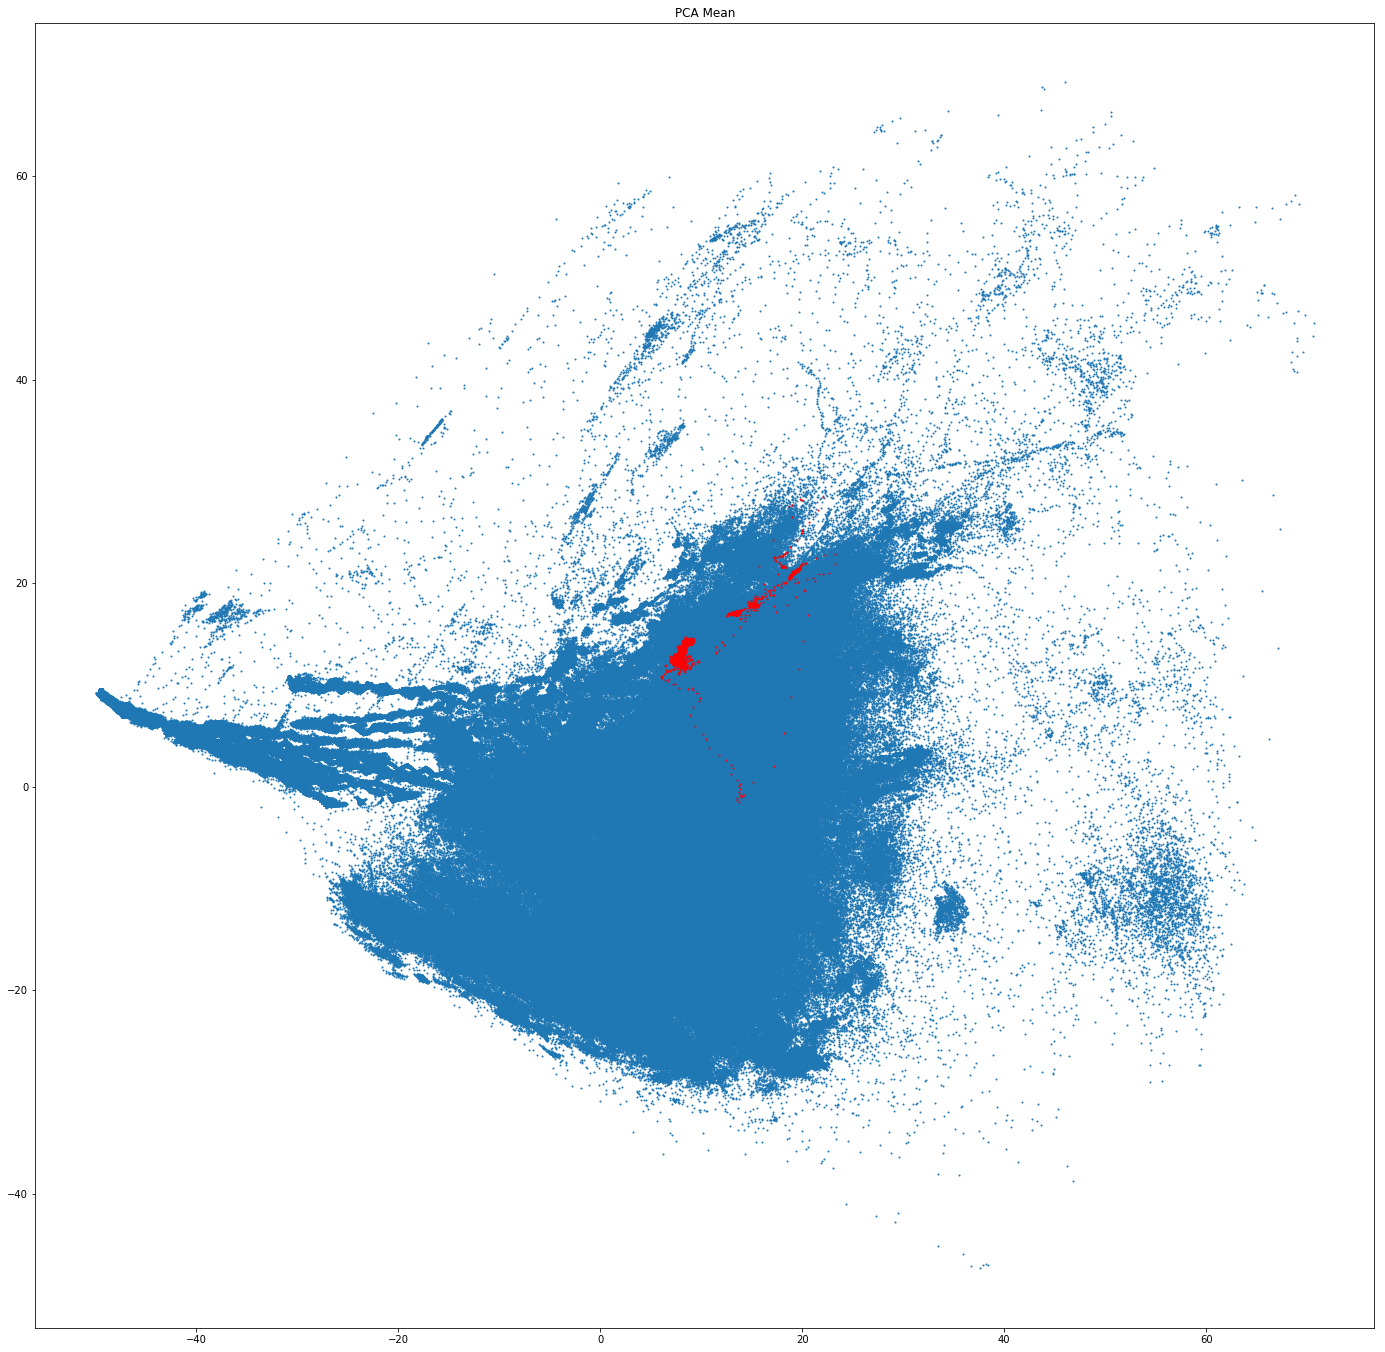

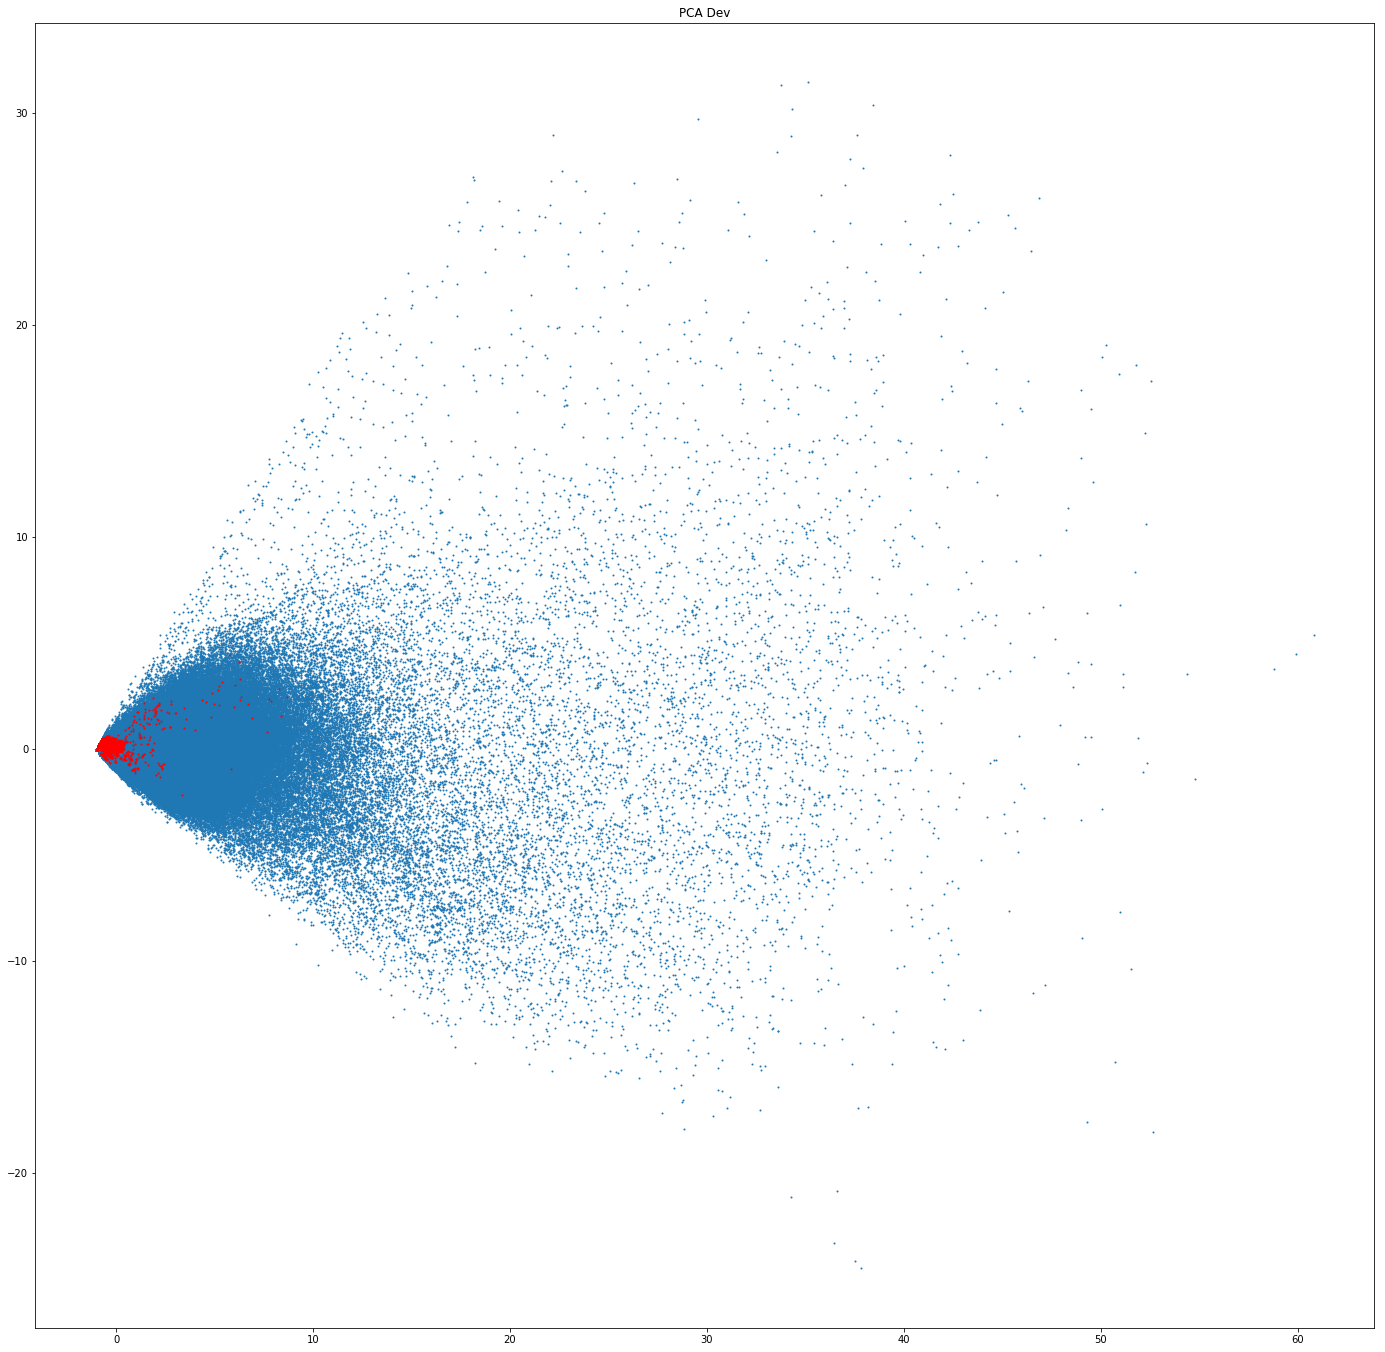

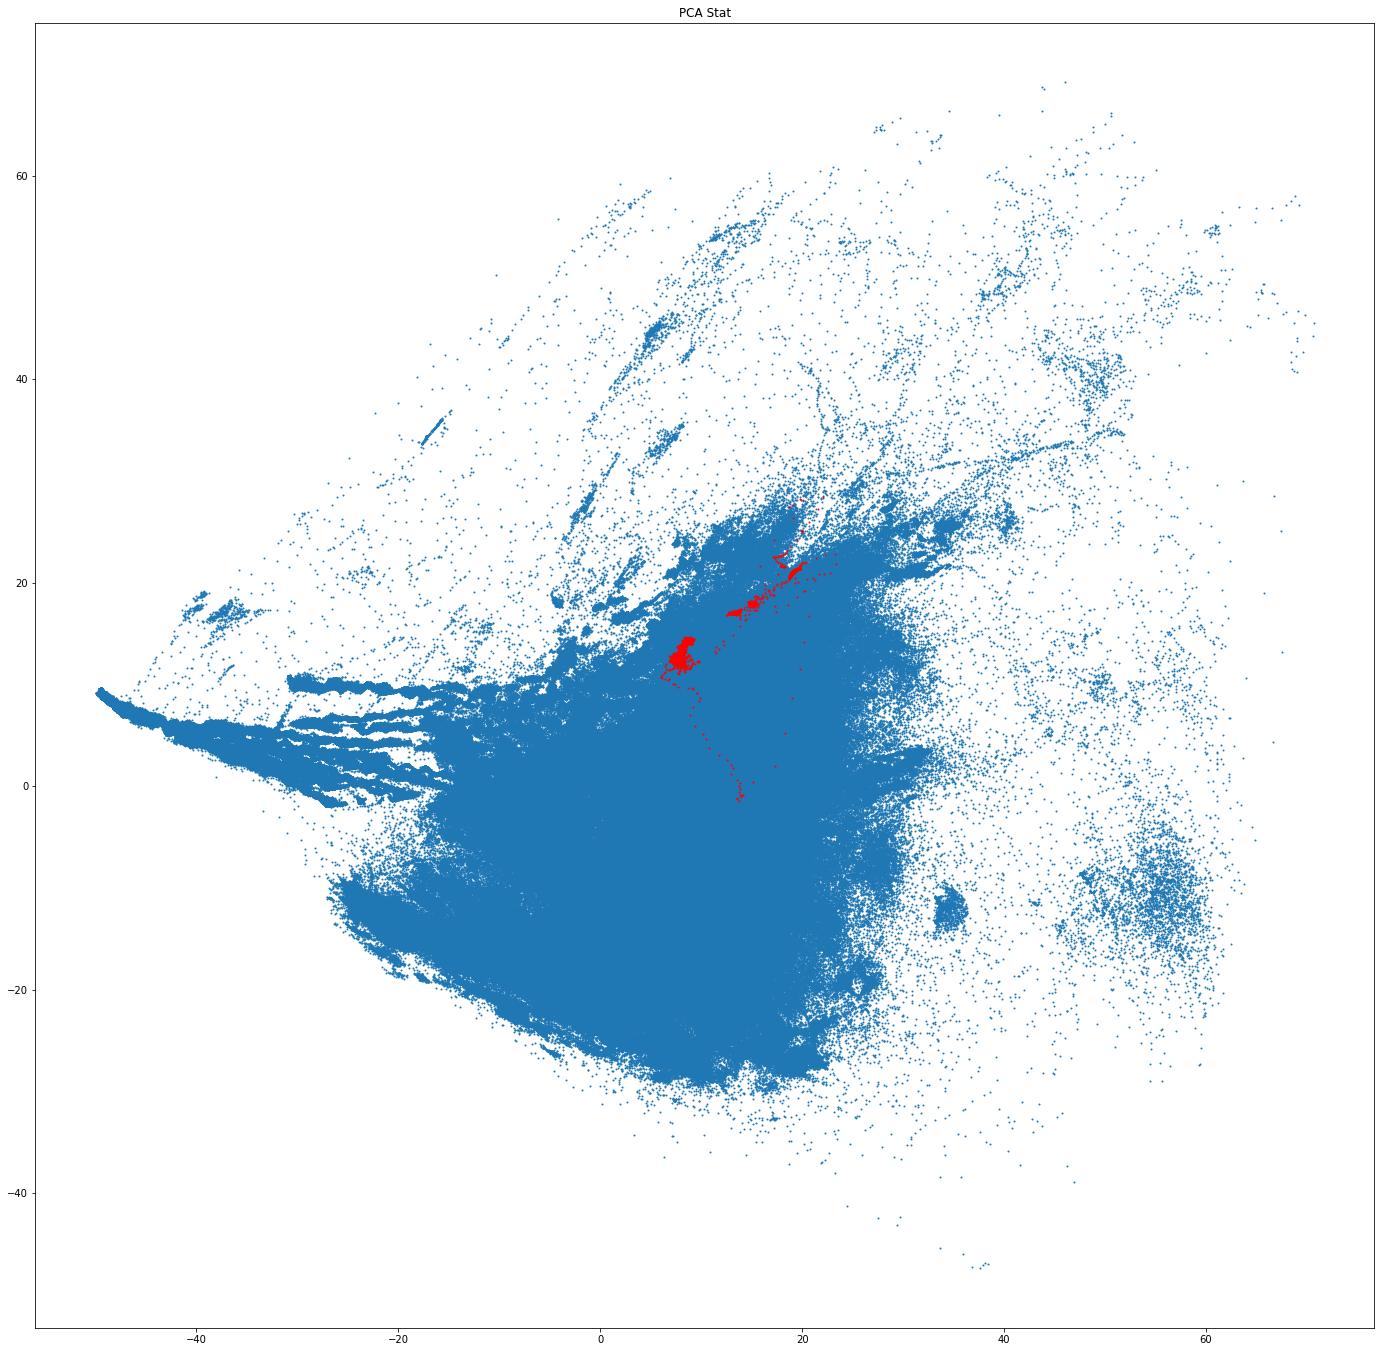

In [21]:

target = datosEstadisticos.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])